In [117]:
# --- Standard library ---
from datetime import datetime
import pickle
import random

# --- Scientific computation ---
import numpy as np
import networkx as nx

# --- Data handling and visualization ---
import pandas as pd  # Dataframe tools
from tabulate import tabulate  # Pretty printing for dataframes

import seaborn as sns  # Easier plotting tools
import matplotlib.pyplot as plt
%matplotlib inline

# --- Visualization ---
rc_dict = {
  "savefig.dpi": 900,  # Saved figure dots-per-inch. 600 is "HD"
  "savefig.facecolor": "white",  # This, combined with transparent setting, keeps saved figs from looking like trash on dark backgrounds
  "savefig.transparent": False,
  "figure.figsize": (14, 10),  # Default (width, height) of figure
}
plt.rcParams.update(rc_dict)

In [118]:
def read_file(filename):
    G = {}

    with open(filename) as file:
        for line in file:
            data = line.strip().split()
            l = int(data[0])
            n = int(data[1])
            m = int(data[2])
            if l not in G:
                G[l] = nx.Graph()
            G[l].add_edge(n, m)

    return G

D_ = read_file("../data/input/raw/duplex_system=london.edgelist")

In [119]:
filepath = "../data/output/raw"
metric = "inverse"
pfi = "0.4"
alpha = 1
beta = 2

fh = f"{filepath}/reconstruction_metric={metric}_pfi={pfi}_system=london_alpha={alpha}_beta={beta}_rep=1.pkl"
with open(fh, "rb") as _fh:
    data = pickle.load(_fh)
D = D_[alpha], D_[beta]

E = data["edge"]
S = data["score"]
C = data["classification"]
O = data["origination"]
n = len(E)

In [120]:
correct = []
incorrect = []
for i in range(n):
    if C[i] == O[i]:
        correct.append(i)
    else:
        incorrect.append(i)

print(f"{len(correct)} of {n} correctly classified -- {len(correct) / n:.3f}%")

65 of 204 correctly classified -- 0.319%


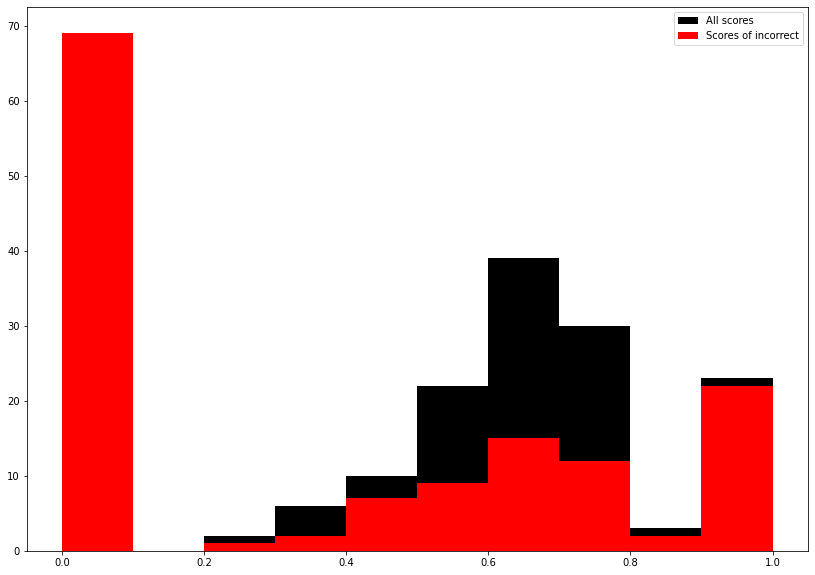

In [121]:
plt.figure()
plt.hist(S, color="black", label="All scores")
plt.hist([S[i] for i in incorrect], color="red", label="Scores of incorrect")
plt.legend()

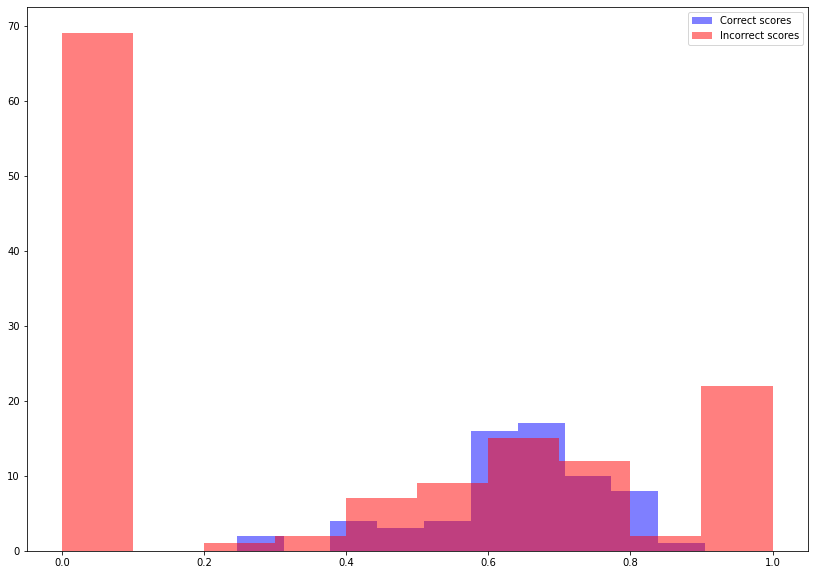

In [122]:
plt.figure()
plt.hist([S[i] for i in correct], color="blue", alpha=0.5, label="Correct scores")
plt.hist([S[i] for i in incorrect], color="red", alpha=0.5, label="Incorrect scores")
plt.legend()

In [123]:
[(E[i], S[i], C[i], O[i]) for i in incorrect][:10]
inc_E = set([E[i] for i in incorrect])

In [124]:
nodes = set(D[0].nodes()) | set(D[1].nodes())
pos_ = {x: (x, random.random()) for x in nodes}

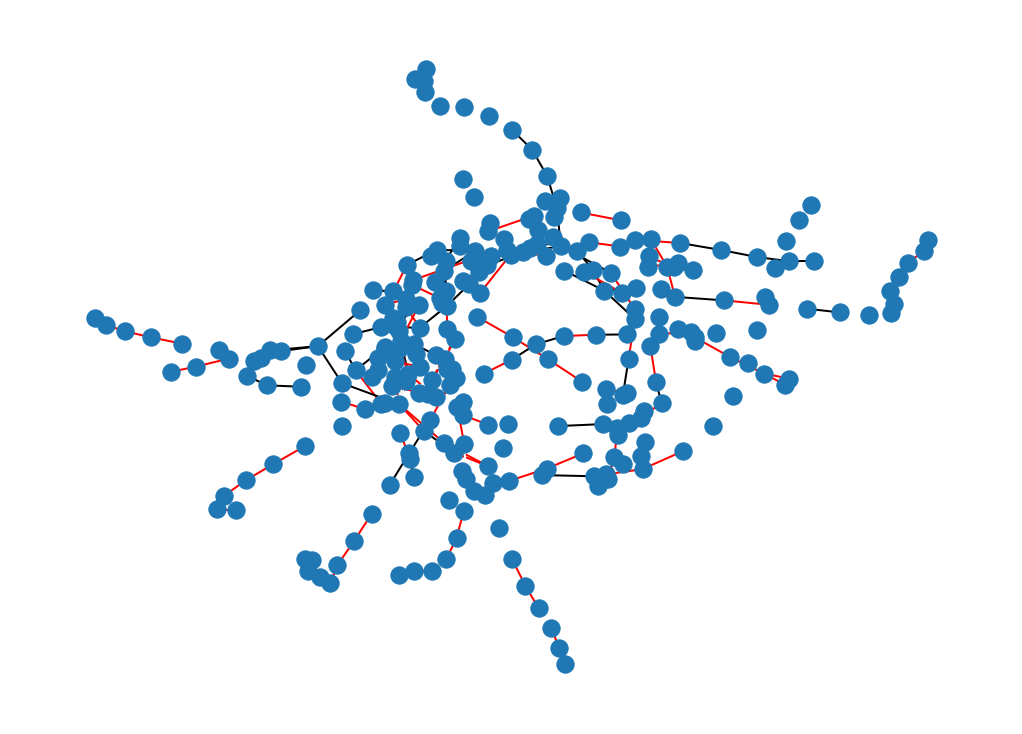

In [125]:
G = D[0]

_color = \
    lambda edge_unknown, edge_incorrect: \
        "white" if not edge_unknown\
        else ("red" if edge_incorrect else "black")
edgecolors = [_color(edge in E, edge in inc_E) for edge in G.edges()]

nx.draw(G, edge_color=edgecolors, width=2)
# nx.draw(G, pos=pos_, edge_color=edgecolors, width=2, node_size=50)

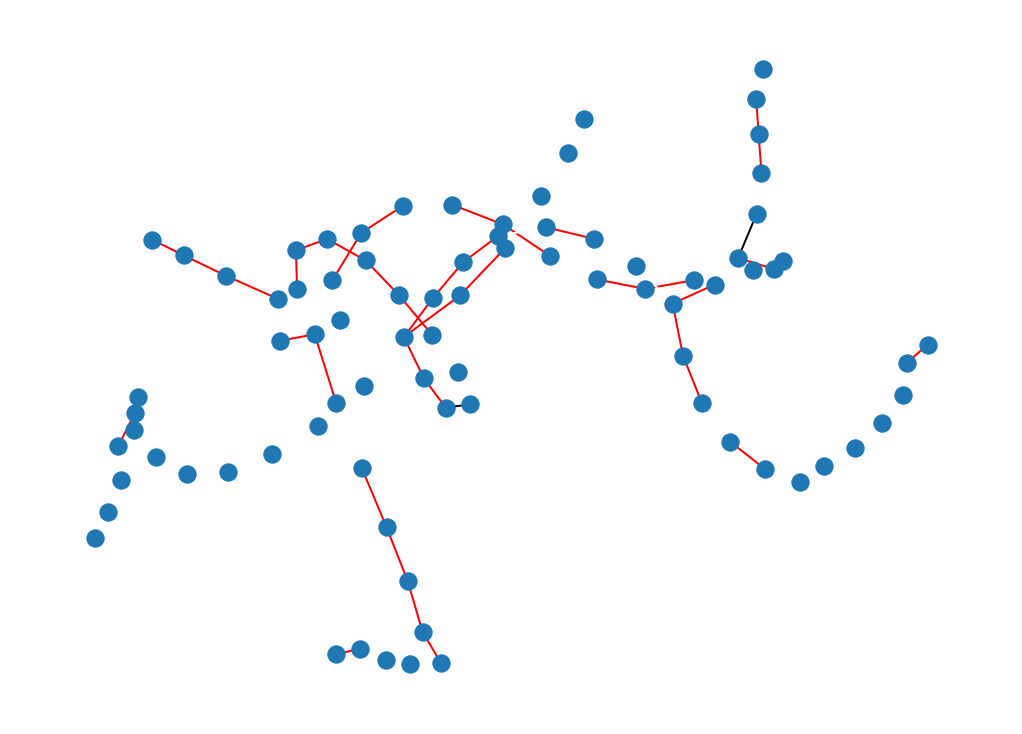

In [126]:
G = D[1]

_color = \
    lambda edge_unknown, edge_incorrect: \
        "white" if not edge_unknown\
        else ("red" if edge_incorrect else "black")
edgecolors = [_color(edge in E, edge in inc_E) for edge in G.edges()]

nx.draw(G, edge_color=edgecolors, width=2)
# nx.draw(G, pos=pos_, edge_color=edgecolors, width=2, node_size=50)